In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
import requests
key='8NBLCOTKI465W93V'
secKey = "d76154d8c11c709dbdaaa8cdf25c2b69424847ba85f2a569742d588d0d53c8b0"

In [3]:
maxRetry = 3

In [4]:
def getStockData(csym, isFull=False, interval="DAILY"):
    retry = 0
    output = None
    while(retry < maxRetry):
        try:
            if isFull:
                url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol="+csym+"&outputsize=full&apikey=8NBLCOTKI465W93V"
            else:
                url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol="+csym+"&apikey=8NBLCOTKI465W93V"
            r = requests.get(url)
            output = r.json()
            if output and "Time Series (Daily)" not in output:
                output = None
                time.sleep(10)
                continue
            #print(output)
            break
        except Exception as e:
            print(e)
            retry = retry + 1
            time.sleep(5)
    if not output:
        return None
    return output

In [5]:
def getTYData(interval, maturity):
    retry = 0
    output = None
    while(retry < maxRetry):
        try:
            url = "https://www.alphavantage.co/query?function=TREASURY_YIELD&interval="+interval+"&maturity="+maturity+"&apikey=8NBLCOTKI465W93V"
            r = requests.get(url)
            output = r.json()
            #print(output)
            break
        except Exception as e:
            print(e)
            retry = retry + 1
            time.sleep(5)
    if not output:
        return None
    return output

In [6]:
ty10Data = getTYData("daily", "10year")
print(ty10Data)

{'name': '10-Year Treasury Constant Maturity Rate', 'interval': 'daily', 'unit': 'percent', 'data': [{'date': '2023-02-09', 'value': '3.67'}, {'date': '2023-02-08', 'value': '3.63'}, {'date': '2023-02-07', 'value': '3.67'}, {'date': '2023-02-06', 'value': '3.63'}, {'date': '2023-02-03', 'value': '3.53'}, {'date': '2023-02-02', 'value': '3.40'}, {'date': '2023-02-01', 'value': '3.39'}, {'date': '2023-01-31', 'value': '3.52'}, {'date': '2023-01-30', 'value': '3.55'}, {'date': '2023-01-27', 'value': '3.52'}, {'date': '2023-01-26', 'value': '3.49'}, {'date': '2023-01-25', 'value': '3.46'}, {'date': '2023-01-24', 'value': '3.46'}, {'date': '2023-01-23', 'value': '3.52'}, {'date': '2023-01-20', 'value': '3.48'}, {'date': '2023-01-19', 'value': '3.39'}, {'date': '2023-01-18', 'value': '3.37'}, {'date': '2023-01-17', 'value': '3.53'}, {'date': '2023-01-16', 'value': '.'}, {'date': '2023-01-13', 'value': '3.49'}, {'date': '2023-01-12', 'value': '3.43'}, {'date': '2023-01-11', 'value': '3.54'}, 

In [7]:
ty2Data = getTYData("daily", "2year")
print(ty2Data)

{'name': '2-Year Treasury Constant Maturity Rate', 'interval': 'daily', 'unit': 'percent', 'data': [{'date': '2023-02-09', 'value': '4.48'}, {'date': '2023-02-08', 'value': '4.45'}, {'date': '2023-02-07', 'value': '4.47'}, {'date': '2023-02-06', 'value': '4.44'}, {'date': '2023-02-03', 'value': '4.30'}, {'date': '2023-02-02', 'value': '4.09'}, {'date': '2023-02-01', 'value': '4.09'}, {'date': '2023-01-31', 'value': '4.21'}, {'date': '2023-01-30', 'value': '4.25'}, {'date': '2023-01-27', 'value': '4.19'}, {'date': '2023-01-26', 'value': '4.17'}, {'date': '2023-01-25', 'value': '4.11'}, {'date': '2023-01-24', 'value': '4.12'}, {'date': '2023-01-23', 'value': '4.21'}, {'date': '2023-01-20', 'value': '4.14'}, {'date': '2023-01-19', 'value': '4.09'}, {'date': '2023-01-18', 'value': '4.06'}, {'date': '2023-01-17', 'value': '4.18'}, {'date': '2023-01-16', 'value': '.'}, {'date': '2023-01-13', 'value': '4.22'}, {'date': '2023-01-12', 'value': '4.12'}, {'date': '2023-01-11', 'value': '4.20'}, {

In [162]:
sData = getStockData("APPN", True)
print(sData)

{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events', '2. Symbol': 'APPN', '3. Last Refreshed': '2023-02-10', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-02-10': {'1. open': '41.01', '2. high': '41.98', '3. low': '40.4', '4. close': '40.64', '5. adjusted close': '40.64', '6. volume': '395335', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-02-09': {'1. open': '43.53', '2. high': '44.245', '3. low': '41.6', '4. close': '41.64', '5. adjusted close': '41.64', '6. volume': '373187', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-02-08': {'1. open': '43.6', '2. high': '44.41', '3. low': '42.73', '4. close': '42.79', '5. adjusted close': '42.79', '6. volume': '298804', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-02-07': {'1. open': '42.61', '2. high': '43.62', '3. low': '41.56', '4. close': '43.42', '5. adjusted close': '43.42', '6. volume': 

In [283]:
df = pd.DataFrame(sData["Time Series (Daily)"])
df = df.T
print(df.columns)
#df = df.drop("1. open")
#df = df[["5. adjusted close"]].copy()
#df1 = pd.DataFrame().assign(StockClose=df["5. adjusted close"])
#df2 = pd.DataFrame().assign(Volume=df["6. volume"])
#df = pd.merge(df1, df2, left_index=True, right_index=True, how='outer')
#df[df.columns[0]] = df[df.columns[0]].astype(float)
#df[df.columns[1]] = df[df.columns[1]].astype(int)
df = df.drop("7. dividend amount", axis=1)
df = df.drop("4. close", axis=1)
df = df.drop("8. split coefficient", axis=1)
#df = df.drop("2. high", axis=1)
#df = df.drop("3. low", axis=1)
#df = df.drop("6. volume", axis=1)
for i,x in enumerate(df.columns):
    df[df.columns[i]] = df[df.columns[i]].astype(float)
    
df = df.sort_index()
#df = df.reset_index(drop=True)
df

Index(['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', '8. split coefficient'],
      dtype='object')


,1. open,2. high,3. low,5. adjusted close,6. volume
2017-05-25,15.00,16.750,14.6000,15.010,4949248.0
2017-05-26,15.25,17.390,15.2291,17.110,1725787.0
2017-05-30,18.19,18.940,17.3000,17.900,1244454.0
2017-05-31,18.48,18.480,17.3100,17.650,671814.0
2017-06-01,17.44,18.300,16.7820,17.945,414601.0
...,...,...,...,...,...
2023-02-06,42.85,44.080,42.2500,42.690,321721.0
2023-02-07,42.61,43.620,41.5600,43.420,413938.0
2023-02-08,43.60,44.410,42.7300,42.790,298804.0
2023-02-09,43.53,44.245,41.6000,41.640,373187.0


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1439 entries, 2017-05-25 to 2023-02-10
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   1. open            1439 non-null   float64
 1   2. high            1439 non-null   float64
 2   3. low             1439 non-null   float64
 3   5. adjusted close  1439 non-null   float64
 4   6. volume          1439 non-null   float64
dtypes: float64(5)
memory usage: 67.5+ KB


<AxesSubplot:>

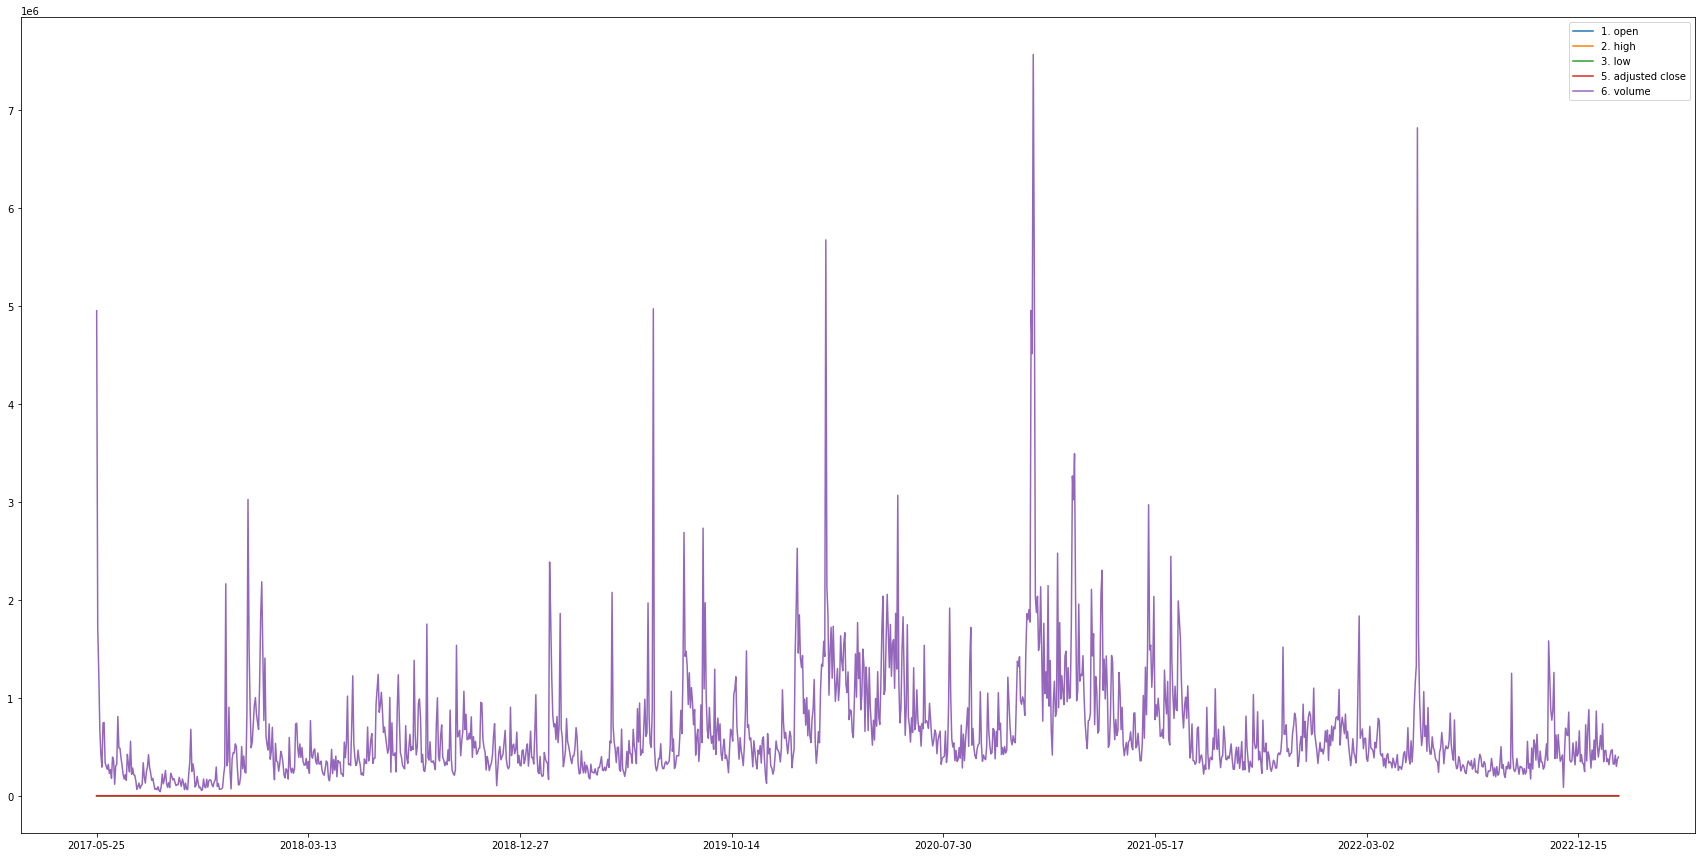

In [285]:
df.plot(figsize=(30,15))

In [286]:
names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']
#df.index = pd.to_datetime(df.index)
#df.index.weekday

#for i, x in enumerate(names):
#    df[x] = (df.index.get_level_values(0).weekday == i).astype(int)
#df["Close"] = df["StockClose"]
df["Close"] = df["5. adjusted close"]
df = df.drop("5. adjusted close", axis=1)
df

,1. open,2. high,3. low,6. volume,Close
2017-05-25,15.00,16.750,14.6000,4949248.0,15.010
2017-05-26,15.25,17.390,15.2291,1725787.0,17.110
2017-05-30,18.19,18.940,17.3000,1244454.0,17.900
2017-05-31,18.48,18.480,17.3100,671814.0,17.650
2017-06-01,17.44,18.300,16.7820,414601.0,17.945
...,...,...,...,...,...
2023-02-06,42.85,44.080,42.2500,321721.0,42.690
2023-02-07,42.61,43.620,41.5600,413938.0,43.420
2023-02-08,43.60,44.410,42.7300,298804.0,42.790
2023-02-09,43.53,44.245,41.6000,373187.0,41.640


In [287]:
data = df[["Close"]]
data = data.rename(columns = {'Close':'Forecast_Close'})

# Setup our target.  This identifies if the price went up or down
#data["Target"] = df.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]
data

,Forecast_Close
2017-05-25,15.010
2017-05-26,17.110
2017-05-30,17.900
2017-05-31,17.650
2017-06-01,17.945
...,...
2023-02-06,42.690
2023-02-07,43.420
2023-02-08,42.790
2023-02-09,41.640


In [288]:
df_prev = df.copy()
df_prev = df_prev.shift(1)
df_prev

,1. open,2. high,3. low,6. volume,Close
2017-05-25,NaN,NaN,NaN,NaN,NaN
2017-05-26,15.00,16.750,14.6000,4949248.0,15.01
2017-05-30,15.25,17.390,15.2291,1725787.0,17.11
2017-05-31,18.19,18.940,17.3000,1244454.0,17.90
2017-06-01,18.48,18.480,17.3100,671814.0,17.65
...,...,...,...,...,...
2023-02-06,43.93,45.360,43.1400,326192.0,43.69
2023-02-07,42.85,44.080,42.2500,321721.0,42.69
2023-02-08,42.61,43.620,41.5600,413938.0,43.42
2023-02-09,43.60,44.410,42.7300,298804.0,42.79


In [289]:
predictors = ["Close", "6. volume", "1. open", "2. high", "3. low"]
data = data.join(df_prev[predictors]).iloc[1:]
df = data
df

,Forecast_Close,Close,6. volume,1. open,2. high,3. low
2017-05-26,17.110,15.010,4949248.0,15.00,16.750,14.6000
2017-05-30,17.900,17.110,1725787.0,15.25,17.390,15.2291
2017-05-31,17.650,17.900,1244454.0,18.19,18.940,17.3000
2017-06-01,17.945,17.650,671814.0,18.48,18.480,17.3100
2017-06-02,17.850,17.945,414601.0,17.44,18.300,16.7820
...,...,...,...,...,...,...
2023-02-06,42.690,43.690,326192.0,43.93,45.360,43.1400
2023-02-07,43.420,42.690,321721.0,42.85,44.080,42.2500
2023-02-08,42.790,43.420,413938.0,42.61,43.620,41.5600
2023-02-09,41.640,42.790,298804.0,43.60,44.410,42.7300


In [290]:
ty10f = pd.DataFrame(ty10Data["data"])
ty10f = ty10f.set_index("date")
ty10f.index.names = [""]
ty10f = ty10f[ty10f.value != "."]
ty10f[ty10f.columns[0]] = ty10f[ty10f.columns[0]].astype(float)
ty10f = ty10f.rename({'value': 'TY10YR'}, axis=1)
ty10f = ty10f.sort_index()
diff = ty10f.diff(axis=0);
diff = diff.rename({'TY10YR': 'TY10YRDIFF'}, axis=1)
#ty10f = pd.merge(ty10f, diff, left_index=True, right_index=True, how='outer')
#ty10f = ty10f[ty10f['TY10YRDIFF'].notna()]
pctchng = ty10f.pct_change()
pctchng = pctchng.rename({'TY10YR': 'TY10YRPCT'}, axis=1)
#print(pctchng)
#ty10f = pd.merge(ty10f, pctchng, left_index=True, right_index=True, how='outer')
#ty10f = ty10f[ty10f['TY10YRPCT'].notna()]
#ty10f = ty10f.drop("TY10YR", axis=1)
ty10f

,TY10YR
,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03
...,...
2023-02-03,3.53
2023-02-06,3.63
2023-02-07,3.67


In [291]:
ty2f = pd.DataFrame(ty2Data["data"])
ty2f = ty2f.set_index("date")
ty2f.index.names = [""]
ty2f = ty2f[ty2f.value != "."]
ty2f[ty2f.columns[0]] = ty2f[ty2f.columns[0]].astype(float)
ty2f = ty2f.rename({'value': 'TY2YR'}, axis=1)
ty2f = ty2f.sort_index()
pctchng = ty2f.pct_change()
pctchng = pctchng.rename({'TY2YR': 'TY2YRPCT'}, axis=1)
#print(pctchng)
#ty2f = pd.merge(ty2f, pctchng, left_index=True, right_index=True, how='outer')
#ty2f = ty2f[ty2f['TY2YRPCT'].notna()]
ty2f

,TY2YR
,
1976-06-01,7.26
1976-06-02,7.23
1976-06-03,7.22
1976-06-04,7.12
1976-06-07,7.09
...,...
2023-02-03,4.30
2023-02-06,4.44
2023-02-07,4.47


In [320]:
#ndf = pd.merge(ty10f, df, left_index=True, right_index=True, how='outer')
#ndf = pd.merge(ty2f, ndf, left_index=True, right_index=True, how='outer')
ndf = ndf[ndf['Close'].notna()]
#ndf = ndf[ndf['TY10YRPCT'].notna()]
#ndf = ndf[ndf['TY10YR'].notna()]
#ndf = ndf[ndf['TY2YR'].notna()]
#ndf = ndf[ndf['TY2YRPCT'].notna()]
ndf = df
print(ndf.shape)
ndf

(1438, 6)


,Forecast_Close,Close,6. volume,1. open,2. high,3. low
2017-05-26,17.110,15.010,4949248.0,15.00,16.750,14.6000
2017-05-30,17.900,17.110,1725787.0,15.25,17.390,15.2291
2017-05-31,17.650,17.900,1244454.0,18.19,18.940,17.3000
2017-06-01,17.945,17.650,671814.0,18.48,18.480,17.3100
2017-06-02,17.850,17.945,414601.0,17.44,18.300,16.7820
...,...,...,...,...,...,...
2023-02-06,42.690,43.690,326192.0,43.93,45.360,43.1400
2023-02-07,43.420,42.690,321721.0,42.85,44.080,42.2500
2023-02-08,42.790,43.420,413938.0,42.61,43.620,41.5600
2023-02-09,41.640,42.790,298804.0,43.60,44.410,42.7300


In [321]:
ndf.corr()

,Forecast_Close,Close,6. volume,1. open,2. high,3. low
Forecast_Close,1.000000,0.995094,0.342408,0.991328,0.993125,0.993779
Close,0.995094,1.000000,0.341969,0.995597,0.997904,0.998369
6. volume,0.342408,0.341969,1.000000,0.342225,0.364289,0.323112
1. open,0.991328,0.995597,0.342225,1.000000,0.997735,0.997936
2. high,0.993125,0.997904,0.364289,0.997735,1.000000,0.997233
3. low,0.993779,0.998369,0.323112,0.997936,0.997233,1.000000


In [322]:
X = ndf.drop(['Forecast_Close'], axis=1)
y = ndf['Forecast_Close']

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [324]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [325]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [330]:
y_pred = model.predict(X_test)
y_pred

array([156.13806836,  53.20898623, 204.6360488 ,  67.61448239,
        65.06064955,  20.93896768,  58.98732678,  34.59397148,
        35.94717191,  26.74567892,  54.57639719, 155.62846223,
        48.79256207,  60.14467361,  57.4733142 ,  50.64473746,
        33.0629334 ,  47.14416997,  22.86624708,  48.28447035,
        21.10228675,  79.84982917,  51.93204426, 113.11420295,
        58.18217028,  23.1476365 ,  38.31346151,  38.7107208 ,
        25.1352028 ,  31.93480116,  88.76394688,  31.97773966,
        33.67063486,  23.39743375,  22.92407525,  57.10488084,
       106.63861811,  36.09035271, 157.32883526,  20.74594663,
        53.13032585, 103.9759273 ,  36.36955687,  28.03265176,
       139.38657269,  74.48490104,  70.87295074, 160.4263898 ,
        60.97237655,  43.96789214,  36.58791672,  29.16956888,
        51.15804499,  29.32097969,  35.34300462,  22.33019666,
        17.26917618,  36.36757854,  39.50104382,  98.16731889,
        23.17395704,  81.97921881, 123.39879024,  35.80

In [331]:
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred))) 

RMSE:  3.6289831367854233


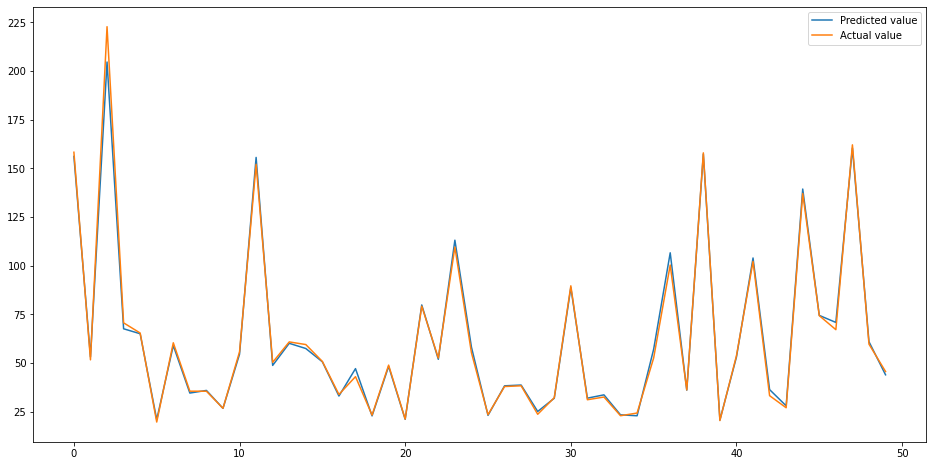

In [332]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Predicted value','Actual value'])

In [333]:
print(y_pred, "\n", y_test)

[156.13806836  53.20898623 204.6360488   67.61448239  65.06064955
  20.93896768  58.98732678  34.59397148  35.94717191  26.74567892
  54.57639719 155.62846223  48.79256207  60.14467361  57.4733142
  50.64473746  33.0629334   47.14416997  22.86624708  48.28447035
  21.10228675  79.84982917  51.93204426 113.11420295  58.18217028
  23.1476365   38.31346151  38.7107208   25.1352028   31.93480116
  88.76394688  31.97773966  33.67063486  23.39743375  22.92407525
  57.10488084 106.63861811  36.09035271 157.32883526  20.74594663
  53.13032585 103.9759273   36.36955687  28.03265176 139.38657269
  74.48490104  70.87295074 160.4263898   60.97237655  43.96789214
  36.58791672  29.16956888  51.15804499  29.32097969  35.34300462
  22.33019666  17.26917618  36.36757854  39.50104382  98.16731889
  23.17395704  81.97921881 123.39879024  35.80686573  50.0693692
  18.14728802 216.22311513  35.54282573  54.08180351  42.09622985
  25.73361254  78.5412976  124.96474237  96.82887778  45.1854278
  38.2927107 